### Union-Find 알고리즘

#### 1. 정의
- 그래프 알고리즘으로 두 노드가 같은 그래프에 속하는지 판별하는 알고리즘
- 노드를 합치는 Union 연산과 루트 노드를 찾는 Find 연산으로 이루어짐.
- '합집합 찾기' , '서로소 집합(Disjoint-Set)' 알고리즘이라고 부름. 

#### 2. 그림을 통해 알아보기
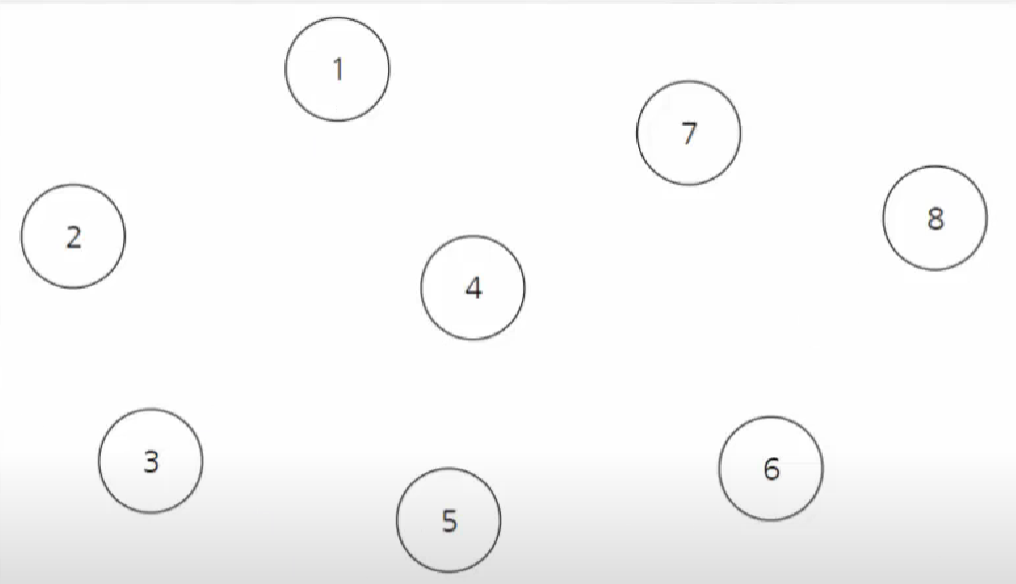

- 만약 1-2-3 노드가 연결되어 있을 때
__Union__ (합침) : 부모를 합칠 때는 일반적으로 더 작은 값으로 합침

|노드번호|1|2|3|4|5|6|7|8|
|---|---|--|--|--|--|--|--|--|
|부모노드번호|1|1|2|4|5|6|7|8|

이때, 3번 노드의 부모노드번호는 사실상 1 -> __Find__ : 재귀함수를 사용해 두개의 노드의 부모노드를 확인하여 현재 같은 집합에 속하는지 확인


### 3. 코드로 구현하기

In [ ]:
# 각 노드의 부모를 담는다. 
# - par의 각 인덱스는 각 노드의 번호이고, 값은 부모 노드를 의미.
N = 8
par = [-1 for i in range(N+1)]   # -1(아직 부모가 정해지지않음) 으로 배열 초기화

# 입력값 x 는 인덱스의 번호 = 즉, 노드의 번호.
# 출력값 par[x]는 부모노드 번호

# find 알고리즘
def find(x):
    # 만약 부모노드가 없다면 x 자체가 부모임.
    if par[x]<0:
        return x
    
    par[x] = find(x)
    return par[x]

# 입력값 i, j는 인덱스의 번호 = 즉, 노드의 번호
# 출력값 False True는 합치지x,합치기를 의미

# union 알고리즘
def union(i,j):
    a, b = find(i), find(j)
    # 만약 부모 노드 번호가 같다면 이미 연결되어 있음.
    if a == b:
        return False

    # 부모 노드를 통일시킴.
    par[j] = a
    return True 

[-1, -1, -1, -1, -1, -1, -1, -1, -1]


********************
### 관련문제 : 
- https://www.acmicpc.net/problem/1647

#### 문제
동물원에서 막 탈출한 원숭이 한 마리가 세상구경을 하고 있다. 그러다가 평화로운 마을에 가게 되었는데, 그곳에서는 알 수 없는 일이 벌어지고 있었다.

마을은 N개의 집과 그 집들을 연결하는 M개의 길로 이루어져 있다. 길은 어느 방향으로든지 다닐 수 있는 편리한 길이다. 그리고 각 길마다 길을 유지하는데 드는 유지비가 있다. 임의의 두 집 사이에 경로가 항상 존재한다.

마을의 이장은 마을을 두 개의 분리된 마을로 분할할 계획을 가지고 있다. 마을이 너무 커서 혼자서는 관리할 수 없기 때문이다. 마을을 분할할 때는 각 분리된 마을 안에 집들이 서로 연결되도록 분할해야 한다. 각 분리된 마을 안에 있는 임의의 두 집 사이에 경로가 항상 존재해야 한다는 뜻이다. 마을에는 집이 하나 이상 있어야 한다.

그렇게 마을의 이장은 계획을 세우다가 마을 안에 길이 너무 많다는 생각을 하게 되었다. 일단 분리된 두 마을 사이에 있는 길들은 필요가 없으므로 없앨 수 있다. 그리고 각 분리된 마을 안에서도 임의의 두 집 사이에 경로가 항상 존재하게 하면서 길을 더 없앨 수 있다. 마을의 이장은 위 조건을 만족하도록 길들을 모두 없애고 나머지 길의 유지비의 합을 최소로 하고 싶다. 이것을 구하는 프로그램을 작성하시오.

#### 입력
첫째 줄에 집의 개수 N, 길의 개수 M이 주어진다. N은 2이상 100,000이하인 정수이고, M은 1이상 1,000,000이하인 정수이다. 그 다음 줄부터 M줄에 걸쳐 길의 정보가 A B C 세 개의 정수로 주어지는데 A번 집과 B번 집을 연결하는 길의 유지비가 C (1 ≤ C ≤ 1,000)라는 뜻이다.

임의의 두 집 사이에 경로가 항상 존재하는 입력만 주어진다.

#### 출력
첫째 줄에 없애고 남은 길 유지비의 합의 최솟값을 출력한다.


In [ ]:
N, M = list(map(int, input().split()))


for _ in range(M):
    a, b, c = list(map(int, input().split()))
    